In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import seaborn as sns

In [3]:
colordict = {
    'L23': array([0.005193, 0.098238, 0.349842]),
    'L4': array([0.092304, 0.32922, 0.38504]),
    'L5': array([0.327007, 0.4579, 0.286377]),
    'L6': array([0.678244, 0.550712, 0.177803]),
}

In [5]:
df_neuron = pd.read_pickle('../../../data/data_tables/df_classifier.pkl')
df_morphos = pd.read_pickle('../../../data/data_tables/df_morphos.pkl')

df_neuron = pd.merge(
    df_neuron,
    df_morphos[['segment_id', 'split_index', 'soma_x', 'soma_y', 'soma_z']],
    on=['segment_id', 'split_index'],
)

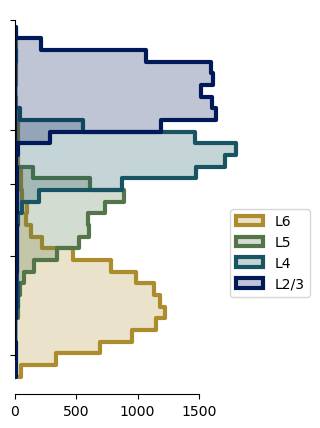

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(3, 5))

sns.histplot(
    data=df_neuron.sort_values('layer_prediction'),
    y='soma_y',
    hue='layer_prediction',
    ax=ax,
    bins=30,
    element="step",
    palette=colordict,
    linewidth=3.0,
)

sns.despine(trim=10)

ax.invert_yaxis()

ax.set_ylabel('')
ax.set_xlabel('')


ax.set_yticks([0, 227, 340, 489, 693])
# ax.set_yticklabels(['Pia', 'L2/3-L4', 'L4-L5', 'L5-L6', 'WM']);

plt.legend(['L6', 'L5', 'L4', 'L2/3'], bbox_to_anchor=(1.3, 0.5))
ax.set_yticklabels([''] * 5);

# fig.savefig('figures/dist_layer.pdf', bbox_inches='tight', transparent=True)